# Trabajo Práctico Nº 1
## Objetivos

- Implementar y analizar el filtro de promedio móvil (moving average) en Python.
- Aplicar el concepto de convolución en señales digitales.
- Familiarizarse con el entorno de desarrollo en Python notebooks.
- Comparar representación en punto flotante vs punto fijo, evaluando precisión y tiempos de cómputo.

# Ejercicio 1 - Filtro Moving Average

1. Implementá un algoritmo de promedio móvil (moving average) según la definición vista en clase, que reciba como parámetros:

- La señal de entrada.
- El tamaño de la ventana.

A partir de tu implementación, obtené y graficá la respuesta impulsiva del sistema (lo que en clase llamamos su “firma” o función de transferencia).

2. Respondé:

- ¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?
- ¿Qué representa en el caso del filtro de promedio móvil?

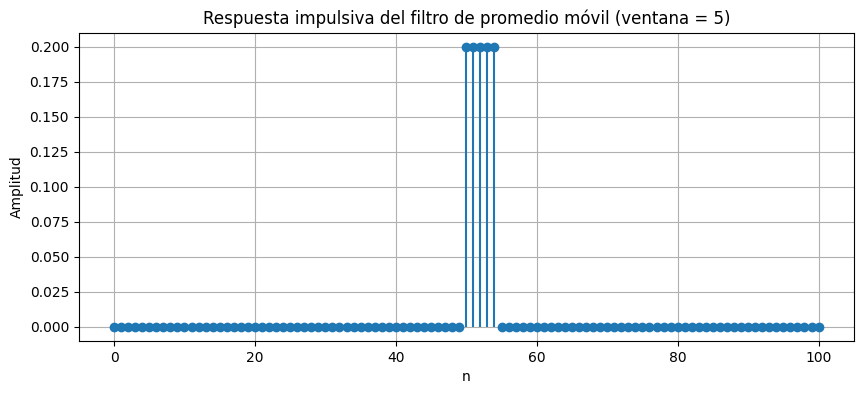

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def moving_average(signal, MVSIZE):
    N = len(signal) #Evita el acceso fuera de los límites del array (avg) y mantiene la longitud de salida igual a la de entrada.
    avg = np.zeros(N)
    for n in range(N):
        suma = 0
        d = 0
        for k in range(MVSIZE):
            if 0 <= n - k < N:
                suma += signal[n - k]
                d += 1
        avg[n] = suma / d if d > 0 else 0
    return avg


# Parámetros
ventana = 5

# Señal delta de Dirac:
N = 100  # longitud total
senal_DDIRAC=np.concatenate((np.zeros(N//2), [1], np.zeros(N//2))) # concateno todo ceros y el pulso que simula el delta de dirac

# Obtener respuesta impulsiva
respuesta = moving_average(senal_DDIRAC, ventana)

# Graficar
plt.figure(figsize=(10, 4))
plt.stem(respuesta, basefmt=" ")
plt.title(f"Respuesta impulsiva del filtro de promedio móvil (ventana = {ventana})")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?
se obtiene aplicando una delta de Dirac a la entrada del sistema y observando la salida

¿Qué representa en el caso del filtro de promedio móvil?

Este filtro actúa como un filtro paso bajo, suavizando las fluctuaciones y conservando la tendencia principal de la señal, aunque una ventana de promediación muy grande puede causar pérdida de información de alta frecuencia y un retraso en la respuesta. 



# Ejercicio 2 - Respuesta del sistema

1. Genera dos señales de prueba:
    - Una onda cuadrada de amplitud 1 y frecuencia de 2 kHz.
    - Una onda triangular de amplitud 1 y frecuencia de 1 kHz.

Aplica el moving average implementado en el Ejercicio 1 a estas señales.

2. Analiza los resultados:

    - Grafica la señal original y la señal filtrada.
    - Explica qué cambios observas en la forma de onda.

3. Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?


## 2.1 Genera dos señales de prueba:
Una onda cuadrada de amplitud 1 y frecuencia de 2 kHz.
Una onda triangular de amplitud 1 y frecuencia de 1 kHz.
Aplica el moving average implementado en el Ejercicio 1 a estas señales.


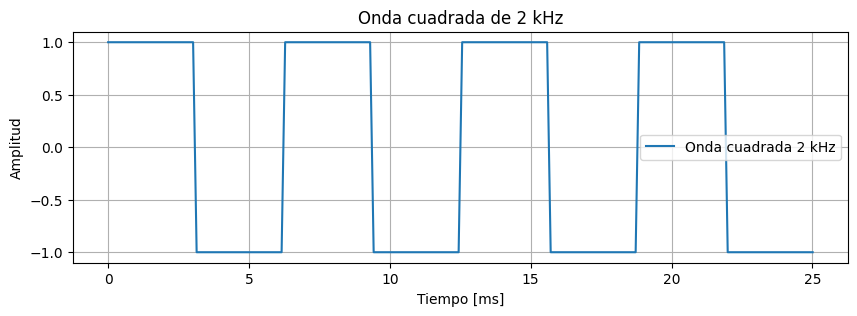

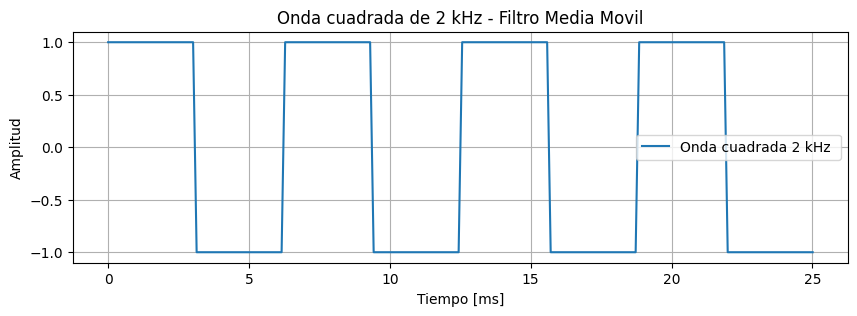

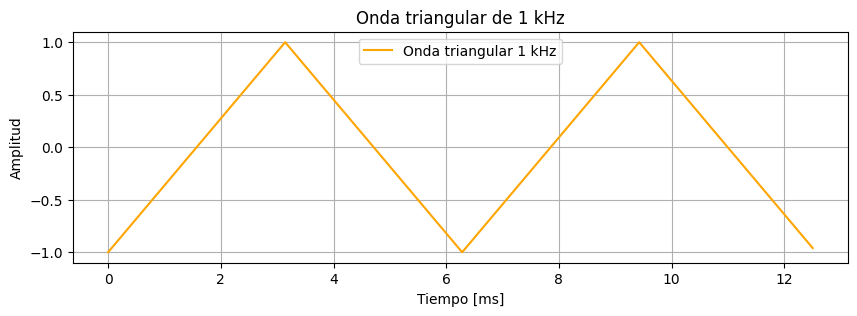

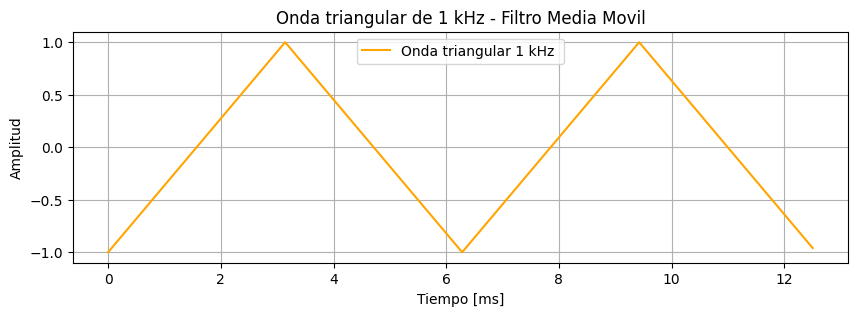

In [35]:
from scipy import signal

frec1 = 2000
frec2 = 1000
f_muestreo = 100000

# Parámetros
ventana = 1

t_max = 2e-3  # duración total de la señal: 2 ms


T = np.arange(0, t_max, 1/f_muestreo)
t1=2 * np.pi * frec1 * T
t2=2 * np.pi * frec2 * T

# Señal cuadrada: 
duty=0.5
senal_cuadrada=signal.square(t1,duty)

plt.figure(figsize=(10, 3))
plt.plot(t1 , senal_cuadrada, label='Onda cuadrada 2 kHz')
plt.title("Onda cuadrada de 2 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


m_senal_cuadrada = moving_average(senal_cuadrada, ventana)

plt.figure(figsize=(10, 3))
plt.plot(t1 , m_senal_cuadrada, label='Onda cuadrada 2 kHz ')
plt.title("Onda cuadrada de 2 kHz - Filtro Media Movil")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


# Señal triangular:
senal_triangular = signal.sawtooth(t2, width=0.5) #Proporción del ciclo en la que la señal sube (entre 0 y 1).

plt.figure(figsize=(10, 3))
plt.plot(t2 , senal_triangular, color='orange', label='Onda triangular 1 kHz')
plt.title("Onda triangular de 1 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

m_senal_triangular = moving_average(senal_triangular, ventana)

plt.figure(figsize=(10, 3))
plt.plot(t2 , m_senal_triangular, color='orange', label='Onda triangular 1 kHz ')
plt.title("Onda triangular de 1 kHz - Filtro Media Movil")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()



## 2.2.A Grafica la señal original y la señal filtrada:
    
    
    
## 2.2.B Explica qué cambios observas en la forma de onda:

    Se observa que a medida que aumenta la ventana del filtro se empieza a perder informacion de la onda, dejando de ver la tendencia de la señal.
    para ventanas "pequeñas" (ej: 5 o 1) se observa como el filtro suavza las fluctuaciones.
    
   

    

# Ejercicio 3 - Convolución en punto flotante y punto fijo

1. Implementa un algoritmo de convolución:

    - En punto flotante (float).
    - En punto fijo, utilizando por ejemplo la librería fixedpoint.

2. Compara los resultados con la función de NumPy np.convolve. Mide y compara:

    - El tiempo de ejecución usando timeit.
    - El error de la salida respecto al cálculo en punto flotante.

3. Conclusión:

    - ¿Qué diferencias observas entre las implementaciones?
    - ¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?

In [36]:
# Ejemplos de medicion de tiempos
# %pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)

0.001007999999274034
0.0


In [47]:
import timeit
from fixedpoint import FixedPoint


def convolve_float(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)
    for n in range(len(y)):
        for k in range(M):
            if 0 <= n - k < N:
                y[n] += x[n - k] * h[k]
    return y

def convolve_fixed(x, h, wordlen=16, fraclen=8):
    N = len(x)
    M = len(h)
    y = [FixedPoint(0, signed=True, m=wordlen-fraclen, n=fraclen) for _ in range(N + M - 1)]
    
    x_fp = [FixedPoint(val, signed=True, m=wordlen-fraclen, n=fraclen) for val in x]
    h_fp = [FixedPoint(val, signed=True, m=wordlen-fraclen, n=fraclen) for val in h]
    
    for n in range(len(y)):
        for k in range(M):
            if 0 <= n - k < N:
                y[n] += x_fp[n - k] * h_fp[k]
    return np.array([float(val) for val in y])


x = np.random.uniform(-1, 1, 1000)
h = np.random.uniform(-1, 1, 50)

# Referencia NumPy
y_np = np.convolve(x, h)

# Manual float
y_float = convolve_float(x, h)

# Punto fijo
y_fixed = convolve_fixed(x, h)

# METODO 1 de medición de tiempos
print("METODO 1")
t_np = timeit.timeit(lambda: np.convolve(x, h), number=1) # permite medir el tiempo de ejecucion de una fracion de codigo
t_float = timeit.timeit(lambda: convolve_float(x, h), number=1)
t_fixed = timeit.timeit(lambda: convolve_fixed(x, h), number=1)

print(f"Tiempo NumPy: {t_np:.8f} s")
print(f"Tiempo float manual: {t_float:.8f} s")
print(f"Tiempo punto fijo: {t_fixed:.8f} s")

print("METODO 2")

start = time.time()
conv_r = np.convolve(x, h)
end = time.time()
print (f"Tiempo NumPy: {(end-start):.10f} s")

start = time.time()
conv_r =convolve_float(x, h)
end = time.time()
print (f"Tiempo float manual: {(end-start):.8f} s")

start = time.time()
conv_r =convolve_fixed(x, h)
end = time.time()
print (f"Tiempo punto fijo: {(end-start):.8f} s")
# El error de la salida respecto al cálculo en punto flotante




METODO 1
Tiempo NumPy: 0.00008720 s
Tiempo float manual: 0.03599140 s
Tiempo punto fijo: 5.62730400 s
METODO 2
Tiempo NumPy: 0.0000000000 s
Tiempo float manual: 0.04226542 s
Tiempo punto fijo: 5.38653302 s



# Conclusión:
### Qué diferencias observas entre las implementaciones?
 Utilizando la funcion de numpy se obtiene un tiempo mucho menor que implementando el algoritmo, esto se debe a que ya tiena optimizado el proceso en C.
 Los se ven diferencias en los resultados de las convoluciones. 
 Se observa que la implementacion por medio de punto flotante es mas rapida que con punto fijo. 

### Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?
 segun la teoria el punto fijo es mas rapido pero con menor precision, al contrario que punto flontante, el cual es mas lento y mas preciso.
 